# Importing the dependencies 


In [1]:
!pip install easyocr imutils

In [3]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 
import imutils 
import easyocr

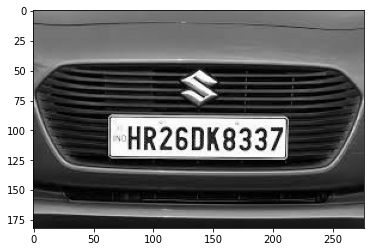

In [4]:
img = cv2.imread("car1.jpg")
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray , cv2.COLOR_BGR2RGB))

# Apply filters and the edge detection 

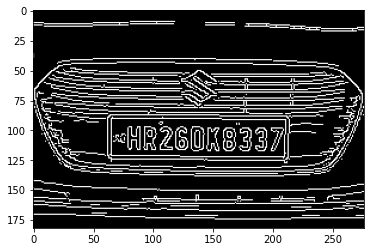

In [5]:
bfilter = cv2.bilateralFilter(gray , 11 , 17 , 17 ) # for noise reduction 
edged = cv2.Canny(bfilter , 30 , 100) # edge detection 
plt.imshow(cv2.cvtColor(edged , cv2.COLOR_BGR2RGB))

# Find the contors and apply the mask 


In [6]:
key_pts = cv2.findContours(edged.copy() , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(key_pts)
contours = sorted (contours , key = cv2.contourArea , reverse = True )[:10]
len(contours)

10

In [7]:
loc = None
for c in contours : 
    approx = cv2.approxPolyDP(c , 10 , True)
    #print(c)
    print(approx)
    
    if len(approx) == 4: 
        loc = approx
        
        break
        
        

[[[  1  65]]

 [[ 24 124]]

 [[247 134]]

 [[275  77]]

 [[260  52]]

 [[ 32  44]]]
[[[  1  66]]

 [[ 32  44]]

 [[236  46]]

 [[275  77]]

 [[241 132]]

 [[ 26 125]]]
[[[ 18  77]]

 [[ 96  85]]

 [[ 62  89]]

 [[ 65 126]]

 [[212 127]]

 [[213 103]]

 [[236 102]]

 [[214  97]]

 [[242  95]]

 [[213  89]]

 [[242  88]]

 [[ 96  86]]

 [[258  80]]]
[[[ 65  91]]

 [[210  91]]

 [[210 121]]

 [[ 66 121]]]


In [8]:
loc

array([[[ 65,  91]],

       [[210,  91]],

       [[210, 121]],

       [[ 66, 121]]], dtype=int32)

# Masking the particular regions

In [9]:
mask = np.zeros(gray.shape , np.uint8)
new_img = cv2.drawContours(mask , [loc] , 0 , 255 , -1)
new_img = cv2.bitwise_and(img , img , mask =mask)

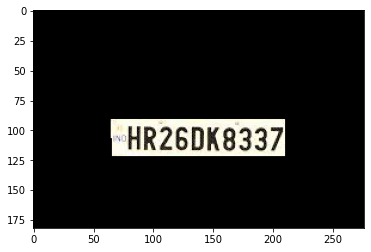

In [10]:
plt.imshow(cv2.cvtColor(new_img , cv2.COLOR_BGR2RGB))

In [11]:
(x , y ) = np.where(mask == 255)
(x1 , y1 ) = (np.min(x) , np.min(y))
(x2 , y2 ) = (np.max(x) , np.max(y))

cropped_img = gray[x1:x2+1 , y1:y2+1]

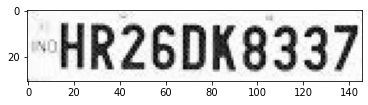

In [12]:
plt.imshow(cv2.cvtColor(cropped_img ,cv2.COLOR_BGR2RGB))

# Ocr To Text convert 

In [ ]:
read = easyocr.Reader(['en'])
result = read.readtext(cropped_img)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


# Render the results to the csv 

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img , text = text , org = (approx[0][0][0] , approx[1][0][1]+60 ) , fontFace = font , fontScale = 1 , color = (0, 255, 0) , thickness = 2 , lineType= cv2.lINE_AA)
res = cv2.rectangle(img , tuple(approx[0][0]) , tuple(approx[2][0]) , (0 , 255, 0) , 3)
plt.imshow(cv2.cvtColor(res , cv2.COLOR_BGR2RGB))